In [6]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

# 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [9]:
df = pd.read_csv('Pizza Sales Dataset.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_day,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,Thursday,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,Thursday,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,Thursday,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,Thursday,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_day', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

### 컬럼명 한국어로 바꾸기

In [12]:
df.rename(columns={
    'pizza_id': '피자 ID',
    'order_id': '주문 ID',
    'pizza_name_id': '피자 이름 ID',
    'quantity': '주문 수량',
    'order_date': '주문 날짜',
    'order_day': '주문 요일',
    'order_time': '주문 시간',
    'unit_price': '단가',
    'total_price': '총액',
    'pizza_size': '피자 사이즈',
    'pizza_category': '피자 종류',
    'pizza_ingredients': '피자 재료 목록',
    'pizza_name': '피자 이름'
}, inplace=True)

In [13]:
# 결측치 확인 : 없음
df.isna().sum()

피자 ID       0
주문 ID       0
피자 이름 ID    0
주문 수량       0
주문 날짜       0
주문 요일       0
주문 시간       0
단가          0
총액          0
피자 사이즈      0
피자 종류       0
피자 재료 목록    0
피자 이름       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   피자 ID     48620 non-null  int64  
 1   주문 ID     48620 non-null  int64  
 2   피자 이름 ID  48620 non-null  object 
 3   주문 수량     48620 non-null  int64  
 4   주문 날짜     48620 non-null  object 
 5   주문 요일     48620 non-null  object 
 6   주문 시간     48620 non-null  object 
 7   단가        48620 non-null  float64
 8   총액        48620 non-null  float64
 9   피자 사이즈    48620 non-null  object 
 10  피자 종류     48620 non-null  object 
 11  피자 재료 목록  48620 non-null  object 
 12  피자 이름     48620 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


## 분석 시작

### - 금요일 시간대별 주문량 분석

In [76]:
# 날짜 + 시간 합쳐서 datetime 열 만들기
df['주문일시'] = pd.to_datetime(df['주문 날짜'] + ' ' + df['주문 시간'])

# 요일 숫자(0~6) → 한글 요일로 변환
요일_매핑 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['주문 요일'] = df['주문일시'].dt.dayofweek.map(lambda x: 요일_매핑[x])

# 카테고리 순서 설정
요일_순서 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['주문 요일'] = pd.Categorical(df['주문 요일'], categories=요일_순서, ordered=True)

# 요일 번호, 시간대 추출
df['요일_번호'] = df['주문일시'].dt.dayofweek
df['시간대'] = df['주문일시'].dt.hour

# 시간대별 주문량 집계
시간대별_주문량 = df['시간대'].value_counts().sort_index()
시간대별_주문량_df = 시간대별_주문량.reset_index()
시간대별_주문량_df.columns = ['시간대', '주문 수']

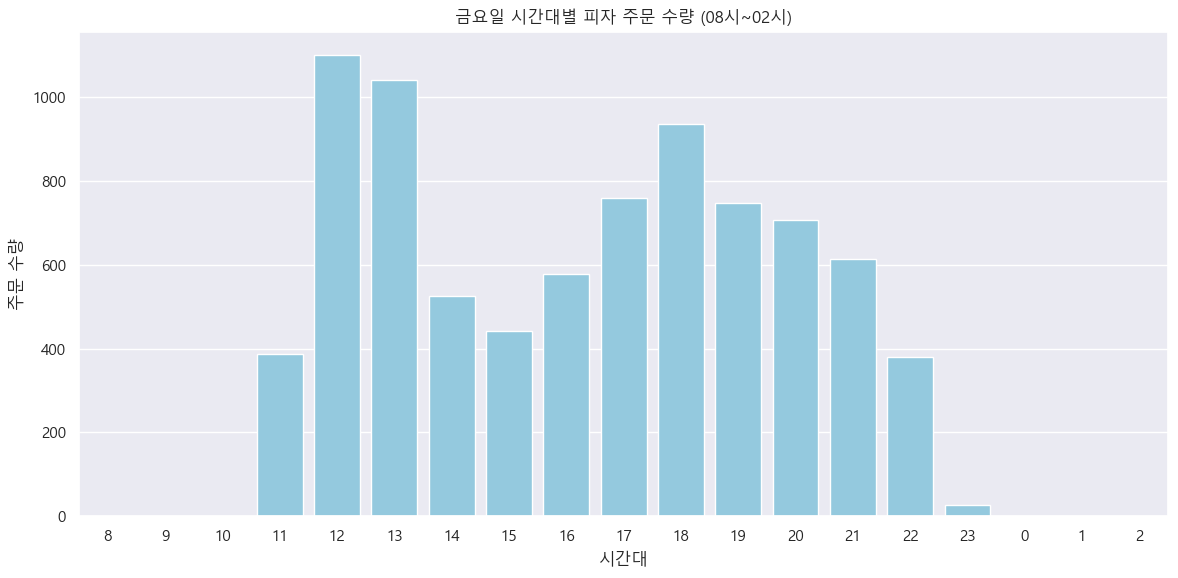

In [94]:
# 1. 금요일 데이터 추출
금요일_데이터 = df[df['주문 요일'] == '금요일']

# 2. 시간대별 주문량 집계
금요일_시간대별_주문량 = 금요일_데이터.groupby('시간대')['주문 수량'].sum().reset_index()

# 3. 보고 싶은 시간대 범위: 아침 8시 ~ 새벽 2시 (0,1,2 포함)
원하는_시간대 = list(range(8, 24)) + [0, 1, 2]
금요일_시간대별_주문량 = 금요일_시간대별_주문량[금요일_시간대별_주문량['시간대'].isin(원하는_시간대)]

# 4. 원하는 시간대 순서대로 정렬
금요일_시간대별_주문량['시간대'] = pd.Categorical(
    금요일_시간대별_주문량['시간대'],
    categories=원하는_시간대,
    ordered=True
)
금요일_시간대별_주문량 = 금요일_시간대별_주문량.sort_values('시간대')

# 5. 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=금요일_시간대별_주문량, x='시간대', y='주문 수량', color='skyblue')
plt.title('금요일 시간대별 피자 주문 수량 (08시~02시)')
plt.xlabel('시간대')
plt.ylabel('주문 수량')
plt.tight_layout()
plt.show()

### - 월 ~ 목 / 금 / 토 ~ 일 나눠서 요일별 주문량 분석

<Axes: xlabel='요일 그룹', ylabel='주문 수량'>

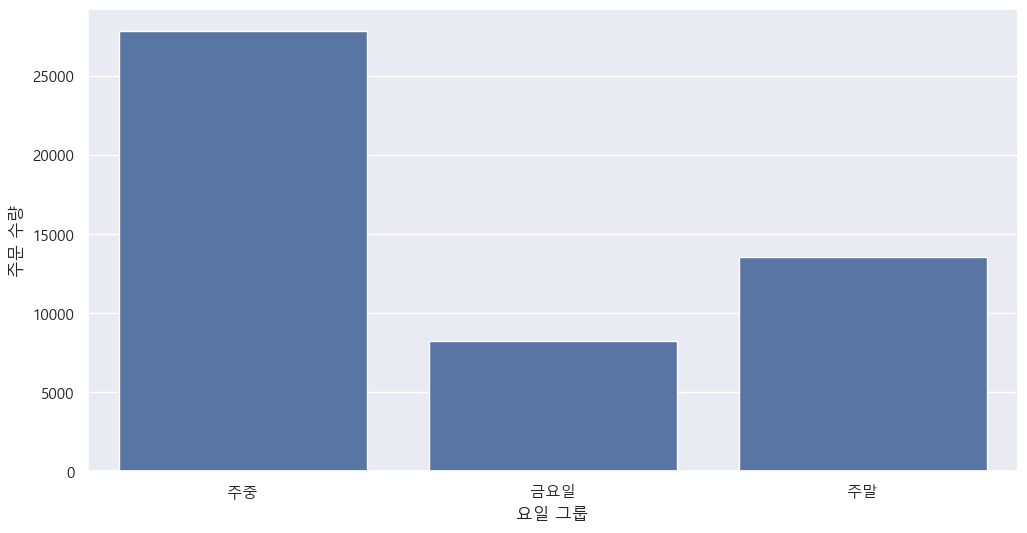

In [129]:
# 순서 지정
요일_순서 = ['주중', '금요일', '주말']
df['요일 그룹'] = pd.Categorical(df['요일 그룹'], categories=요일_순서, ordered=True)

# 그룹별 집계
요일그룹별_합계 = df.groupby('요일 그룹', observed=False)['주문 수량'].sum().reset_index()

# 시각화
sns.barplot(
    data=요일그룹별_주문량,
    x='요일 그룹',
    y='주문 수량'
)

<Axes: xlabel='요일 그룹', ylabel='평균 주문 수량'>

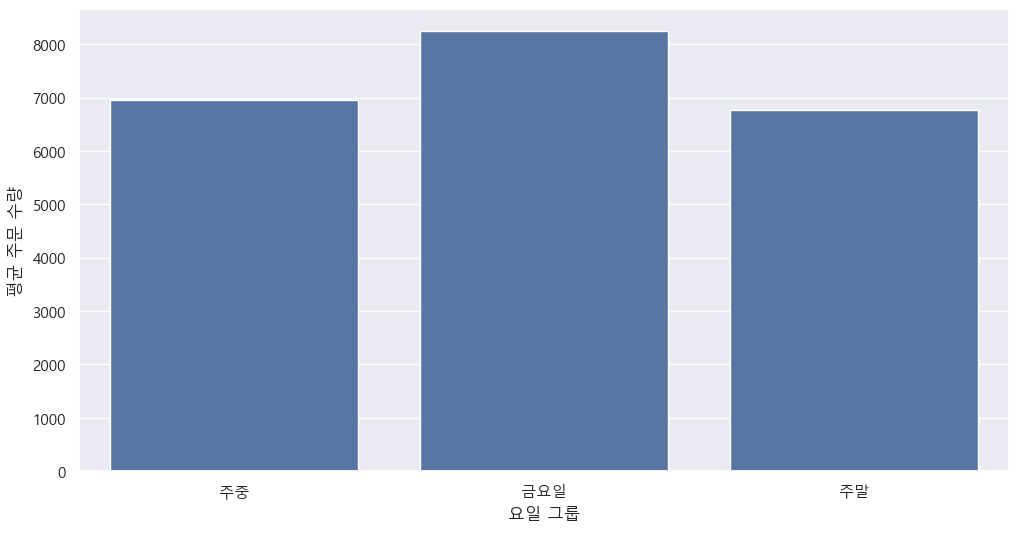

In [133]:
# 요일 → 요일 그룹 매핑
요일_그룹 = {
    '월요일': '주중',
    '화요일': '주중',
    '수요일': '주중',
    '목요일': '주중',
    '금요일': '금요일',
    '토요일': '주말',
    '일요일': '주말'
}
df['요일 그룹'] = df['주문 요일'].map(요일_그룹)

# 총 주문 수량 집계
요일그룹별_합계 = df.groupby('요일 그룹')['주문 수량'].sum().reset_index()
요일그룹별_합계.columns = ['요일 그룹', '총 주문 수량']

# 각 그룹의 요일 수 정의
요일_수 = {
    '주중': 4,
    '금요일': 1,
    '주말': 2
}
요일그룹별_합계['요일 수'] = 요일그룹별_합계['요일 그룹'].map(요일_수)
요일그룹별_합계['평균 주문 수량'] = 요일그룹별_합계['총 주문 수량'] / 요일그룹별_합계['요일 수']

# 순서 정리
요일_순서 = ['주중', '금요일', '주말']
요일그룹별_합계['요일 그룹'] = pd.Categorical(요일그룹별_합계['요일 그룹'], categories=요일_순서, ordered=True)
요일그룹별_합계 = 요일그룹별_합계.sort_values('요일 그룹')

# 시각화
sns.barplot(
    data=요일그룹별_합계,
    x='요일 그룹',
    y='평균 주문 수량'
)